WORLD HAPPINESS REPORT

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
##from statsmodel.graphics.gofplots import qqplot
from scipy.stats import zscore
df=pd.read_csv("E:\happiness_score_dataset.csv")
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


LOADING DATA

In [6]:
df.shape

(158, 12)

158 rows and 12 columns

In [6]:

df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

country,region are string happiness rank is int remaining all are float

In [63]:
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


happiness score is max 7.587 it means no country has more than 8.happiness rank 1 is country having least happy people

In [3]:

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

no missing values

Handling outliers

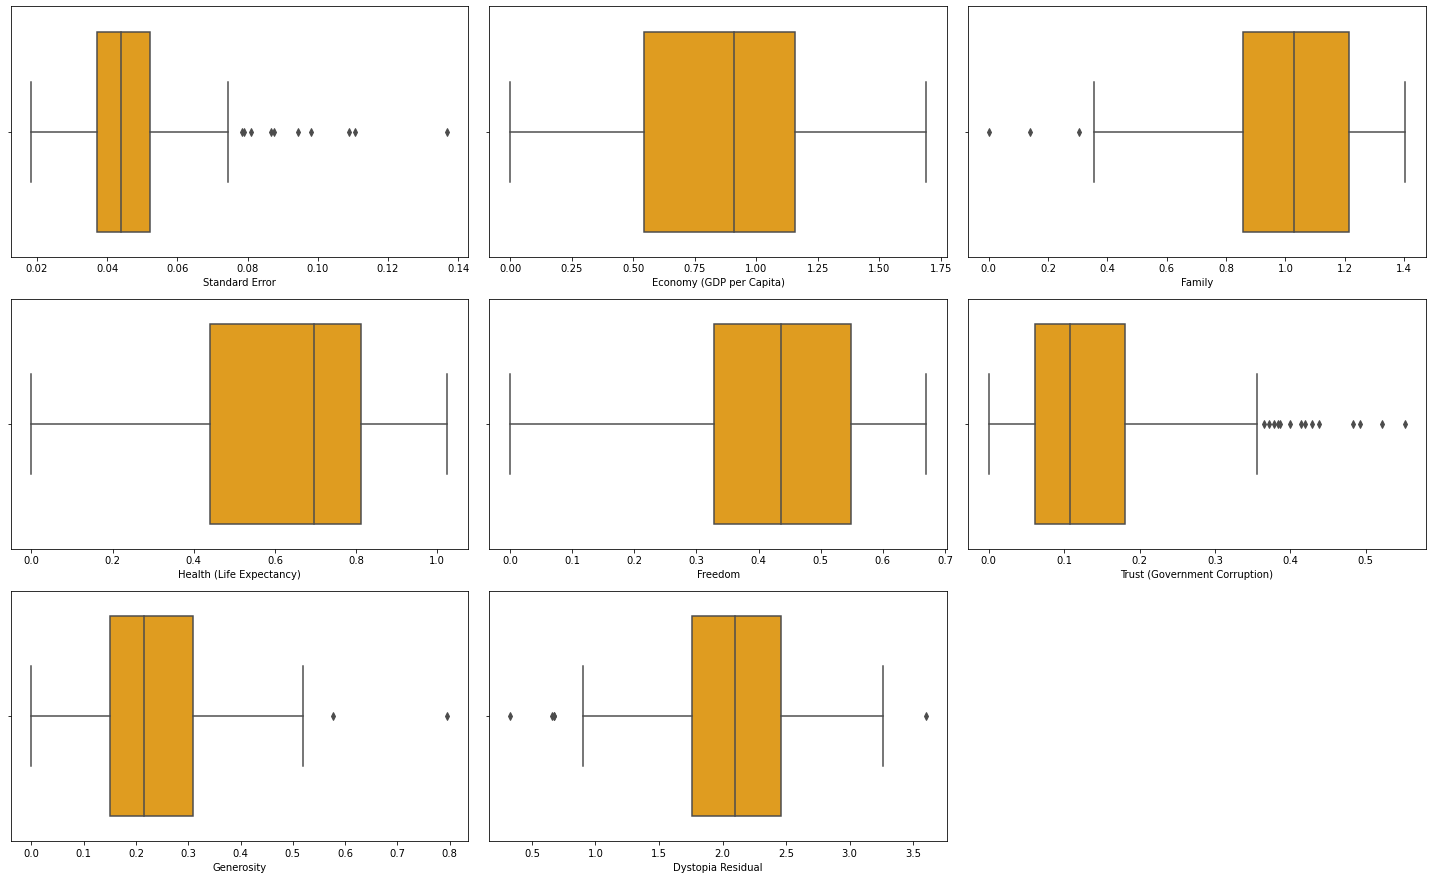

In [4]:
collist=['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
ncol=3
nrows=5
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange')
plt.tight_layout()

In [ ]:
collist

from box plot and zscore its clearely state that features like Family,standard error,Trust (Government Corruption),Generosity,
Dystopia Residual having outliers

In [248]:
z = np.abs(zscore(df['Family']))
print(np.where(z > 3))

(array([147, 157], dtype=int64),)


In [219]:
z = np.abs(zscore(df['Standard Error'])) 
print(np.where(z > 3))

(array([ 40,  64, 115], dtype=int64),)


In [220]:
z = np.abs(zscore(df['Economy (GDP per Capita)'])) 
print(np.where(z > 3))

(array([], dtype=int64),)


In [221]:
z = np.abs(zscore(df['Health (Life Expectancy)']))
print(np.where(z > 3))

(array([], dtype=int64),)


In [222]:
z = np.abs(zscore(df['Freedom']))
print(np.where(z > 3))

(array([], dtype=int64),)


In [223]:
z = np.abs(zscore(df['Trust (Government Corruption)']))
print(np.where(z > 3))

(array([ 27, 153], dtype=int64),)


In [224]:
z = np.abs(zscore(df['Generosity']))
print(np.where(z > 3))


(array([128], dtype=int64),)


In [225]:
z = np.abs(zscore(df['Dystopia Residual']))
print(np.where(z > 3))

(array([155], dtype=int64),)


In [65]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder()
df['Region']= label.fit_transform(df['Region']) 
print(df['Region'].unique())

[9 5 0 4 3 6 1 2 8 7]


In [66]:
df.drop(df.columns[[0]],axis=1,inplace=True)

dropping feature having object value to get zscore

In [67]:
df.head(5)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [68]:
z = np.abs(zscore(df))
print(np.where(z > 3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))


displaying outliers using zscore

In [69]:
data_clean = df[(z<3).all(axis=1)]
data_clean.shape

(149, 11)

removing outliers

In [70]:
((158-149)/158)*100

5.69620253164557

here data loss after removing outliers is 5.69% so outliers are removed

In [29]:
data_clean.head(5)



,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


correlation matrix and heatmap used to find the correlation of each feature with other feature

<AxesSubplot:>

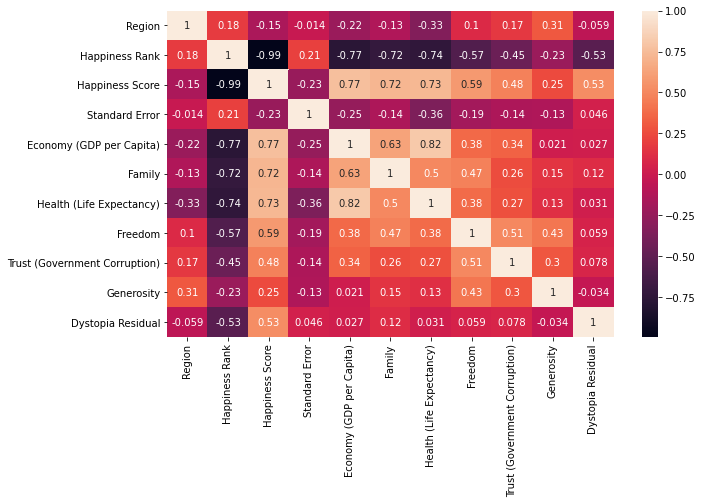

In [12]:
correlation=data_clean.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

except standard error all are positively correlated to happy score.economy,family and health(life expectancy) are strongly correlated

<AxesSubplot:title={'center':'Happiness Score across different regions'}, xlabel='Happiness Score', ylabel='Region'>

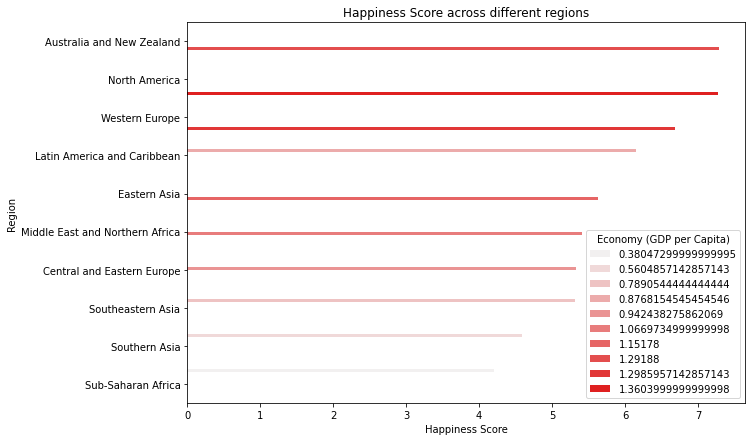

In [10]:
region=df.groupby(['Region']).mean()
region_df=pd.DataFrame(data=region)
order_reg=region_df.sort_values(by='Happiness Score',ascending=False,axis=0)
plt.figure(figsize=(10,7))
plt.title('Happiness Score across different regions')
sns.barplot(x='Happiness Score',y=order_reg.index,data=order_reg,hue="Economy (GDP per Capita)",color="red")


australia and newzealand region has most happy and rich people and sub-saharan region has most un happy people and poor
latin America and carbbien are poor but happy

<AxesSubplot:title={'center':'Happiness Score across different regions'}, xlabel='Happiness Score', ylabel='Region'>

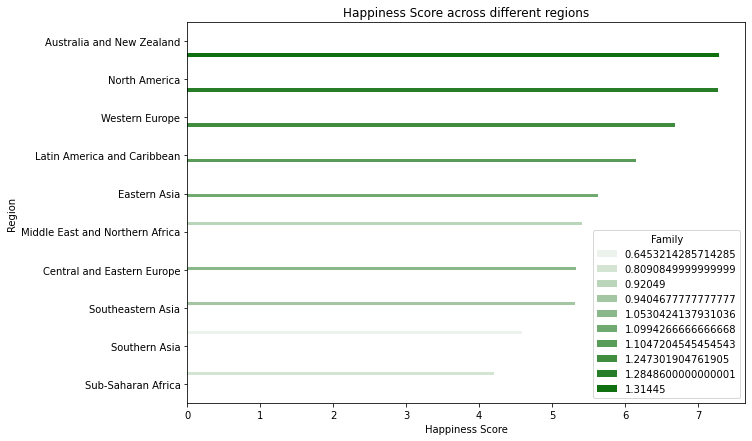

In [64]:
region=df.groupby(['Region']).mean()
region_df=pd.DataFrame(data=region)
order_reg=region_df.sort_values(by='Happiness Score',ascending=False,axis=0)
plt.figure(figsize=(10,7))
plt.title('Happiness Score across different regions')
sns.barplot(x='Happiness Score',y=order_reg.index,data=order_reg,hue="Family",color="green")

here middle east,northern africa  has happy people with less family attachment

<AxesSubplot:title={'center':'Happiness Score across different regions'}, xlabel='Happiness Score', ylabel='Region'>

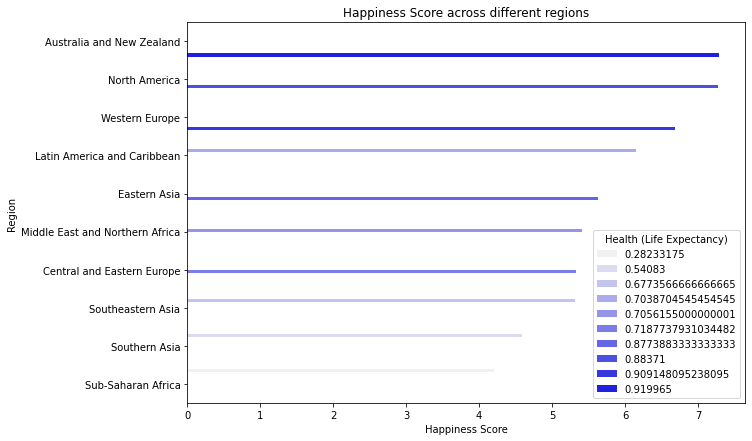

In [67]:
region=df.groupby(['Region']).mean()
region_df=pd.DataFrame(data=region)
order_reg=region_df.sort_values(by='Happiness Score',ascending=False,axis=0)
plt.figure(figsize=(10,7))
plt.title('Happiness Score across different regions')
sns.barplot(x='Happiness Score',y=order_reg.index,data=order_reg,hue="Health (Life Expectancy)",color="blue")

In this above plot latin america region has happy people but unhealthy
from these plots it defines that features GDP,health,Family predicts happy_score almost correct but in few region it is negatively correlated


<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

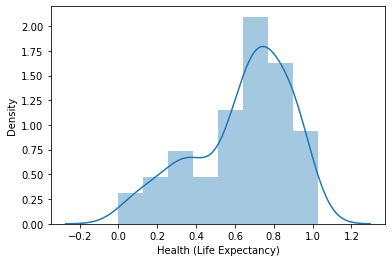

In [12]:
sns.distplot(data_clean['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

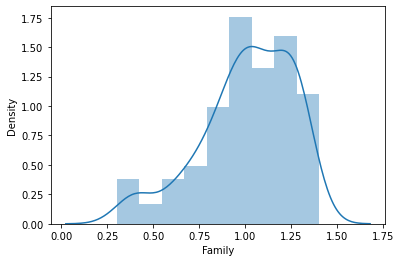

In [12]:
sns.distplot(data_clean['Family'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

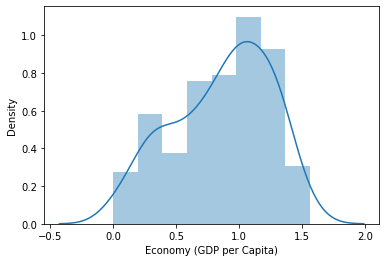

In [83]:
sns.distplot(data_clean['Economy (GDP per Capita)'])

To check skewness I have displayed distribution of features GDP,Family and Health

In [10]:
h= (data_clean['Health (Life Expectancy)']).skew()
f= (data_clean['Family']).skew()
e= (data_clean['Economy (GDP per Capita)']).skew()
print("skewness of health",h)
print("skewness of family",f)
print("skewness of Economy",e)

skewness of health -0.74771115126522
skewness of family -0.8113402316611611
skewness of Economy -0.3906568832817616


checking for skewness in health,family and GDP features beacause these are correlated.Economy GDP has value -0.3 which is between -.5 to .5 so it is allowed.for family and health I'm trying to remove skewness

In [349]:
data_tran=data_clean

In [347]:
data_tran['Health (Life Expectancy)']=np.log1p(data_tran['Health (Life Expectancy)'])
data_tran['Family']=np.log1p(data_tran['Family'])

In [348]:
h= (data_clean['Health (Life Expectancy)']).skew()
f= (data_clean['Family']).skew()
e= (data_clean['Economy (GDP per Capita)']).skew()
print("skewness of health",h)
print("skewness of family",f)
print("skewness of Economy",e)

skewness of health -1.028014628771917
skewness of family -1.1312538750756145
skewness of Economy -0.3906568832817616


In [350]:
data_tran['Health (Life Expectancy)']=np.cbrt(data_tran['Health (Life Expectancy)'])
data_tran['Family']=np.cbrt(data_tran['Family'])

In [352]:
h= (data_clean['Health (Life Expectancy)']).skew()
f= (data_clean['Family']).skew()
e= (data_clean['Economy (GDP per Capita)']).skew()
print("skewness of health",h)
print("skewness of family",f)
print("skewness of Economy",e)

skewness of health -2.565789196940441
skewness of family -1.5533798720955772
skewness of Economy -0.3906568832817616


I have used cbrt,log10,log1p transformation to remove skewness but it  is increasing the value so I'm not removing skewness

In [71]:
data_clean

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


MODELING

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [52]:
x=data_clean.drop('Happiness Score',axis=1)
y=data_clean['Happiness Score']

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [56]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

KNeighborsRegressor()
Mean absolute error 0.04671999999999991
Mean squared error 0.01047665119999999
Root Mean squared error 0.10235551377429547
R2 Score 0.9884813505790675
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.07107091383559867
Mean squared error 0.015622997825271394
Root Mean squared error 0.1249919910445121
R2 Score 0.9828231529886867
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.059879999999999926
Mean squared error 0.013176480000000004
Root Mean squared error 0.11478884963270607
R2 Score 0.9855129992566777
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.00028667646558553804
Mean squared error 1.0764082315847491e-07
Root Mean squared error 0.00032808660923371274
R2 Score 0.9999998816533

In [57]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  LinearRegression() 0.00028667646558553804
Minimum Mean squared error is shown by  LinearRegression() 1.0764082315847491e-07
Minimum Root Mean squared error is shown by  LinearRegression() 0.00032808660923371274
Maximun R2 Score is shown by  LinearRegression() 0.9999998816533182


Here linear regression has highest accuracy score 0.9999998816533182

In [73]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':[True, False],
 "normalize":[True, False],
 "copy_X":[True, False],
 "positive":[True, False]
 }
cvInstance = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = "r2")

In [75]:
cvInstance.fit(data_clean.drop(["Happiness Score"], axis=1), data_clean['Happiness Score'])
cvInstance.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

In [79]:
x=data_clean.drop('Happiness Score',axis=1)
y=data_clean['Happiness Score']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=7)

In [80]:
lnr=LinearRegression(fit_intercept=False, normalize=True)
lnr.fit(x_train, y_train)
lnr.score(x_test,y_test)

0.9999998854430971

In [81]:
p = lnr.predict(x_test)

In [84]:
mae=mean_absolute_error(p,y_test)
mse=mean_squared_error(p,y_test)
rmse=np.sqrt(mean_squared_error(p,y_test))
r2=r2_score(y_test,p)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('R2 Score',r2)

Mean absolute error 0.0002829194834371851
Mean squared error 1.0419387459188524e-07
Root Mean squared error 0.00032279075976843766
R2 Score 0.9999998854430971


After hyper tuning the r2 score of linear regression model is 0.9999998854430971